## ML_SP22_RE_4 
### Due Date: 03/25 before Mid-night
### Linear Regression, One-hot encoding and K-fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This review exercise is on building a Linear Regression model, practice k-fold cross validation and one-hot encoding 

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [2]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

***Type your code here***

In [5]:
# Use Scatter plots and correlation to identify the most important variable that can explain the house price.
# Lets ensure that the dataset is SANITIZED 
housing.isnull().sum()

Income                  0
HouseAge                0
NumberOfRooms           0
AreaNumberOfBedrooms    0
Population              0
Price                   0
Address                 0
dtype: int64

In [18]:
# Lets take a lot of the numerical variables in our dataset and do a correlation to quickly determine the best features
housing_correlation = housing.corr()
housing_correlation

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [23]:
# According to the above data; we see that Price has the following values 
housing_correlation['Price']

Income                  0.639734
HouseAge                0.452543
NumberOfRooms           0.335664
AreaNumberOfBedrooms    0.171071
Population              0.408556
Price                   1.000000
Name: Price, dtype: float64

In [55]:
# We can see that the two highest correlated features to our label are INCOME and HOUSEAGE followed by POPULATION
# Lets plot INCOME and HOUSEAGE on a scatterplot to view the correlations on our label POPULATION
feature_income = housing['Income'].values
feature_house_age = housing['HouseAge'].values
label_price = housing['Price'].values
feature_income

array([79545.45857, 79248.64245, 61287.06718, ..., 63390.68689,
       68001.33124, 65510.5818 ])

In [61]:
# We have to reshape this data to be utilized by our linear regression model, currently the format is seperated into 4 columns which is not permittable
X1= feature_income.reshape(-1,1)

In [62]:
# We have to do this for all the features and labels to be inputted in our linear regression model
X2=-feature_house_age.reshape(-1,1)

In [63]:
Y1=label_price.reshape(-1,1)

In [70]:
# let us create | instantiate a LinearRegression model for both FEATURES by calling the LinearRegression() function.
housing_income_model = LinearRegression()
housing_house_age_model = LinearRegression()

In [71]:
# correlation for PRICE vs INCOME
housing_income_model.fit(X1,Y1)

LinearRegression()

In [72]:
# correlation for PRICE vs HOUSE AGE
housing_house_age_model.fit(X2,Y1)

LinearRegression()

In [73]:
# Let us Inspect our Y-intercept and m-Coefficient (Y=mX+B) for model 1
print(housing_income_model.intercept_,housing_income_model.coef_)

[-221579.47822252] [[21.19548317]]


In [74]:
# Let us Inspect our Y-intercept and m-Coefficient (Y=mX+B) for model 2
print(housing_house_age_model.intercept_,housing_house_age_model.coef_)

[268677.03101956] [[-161177.82097407]]


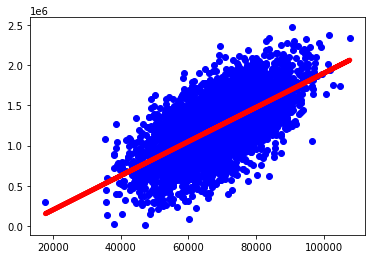

In [79]:
# plot for model 1 
# first ensure that we get the best line for Y1 using .predict for our selected feature 'income'
y1_prediction = housing_income_model.predict(X1)
plt.scatter(X1,Y1,color='blue')
plt.plot(X1,y1_prediction,color='red',linewidth=5)
plt.show()

# Note that this the feature is positively correlated with our label 
# I.E. The attribute 'income' is positively correlated with predicting our hypothesis for 'price'

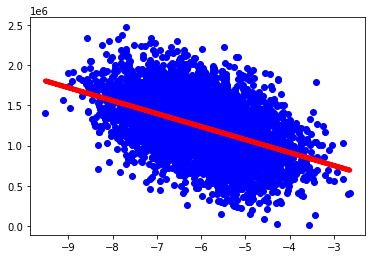

In [84]:
# plot for model 2 
# first ensure that we get the best line for Y1 using .predict for our selected feature 'house_age'
y1_prediction_2 = housing_house_age_model.predict(X2)
plt.scatter(X2,Y1,color='blue')
plt.plot(X2,y1_prediction_2,color='red',linewidth=5)
plt.show()

# Note that this the feature is negatively correlated with our label 
# I.E. The attribute 'house_age' is negatively correlated with predicting our hypothesis for 'price'

In [85]:
# REMEMEBER THAT IN ORDER TO PERFORM METRICS YOU NEED SOMETHING TO TEST IT AGAINST 
# SPLIT THE DATASET
# This is for our Income vs Price model
from sklearn.model_selection import train_test_split 
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [95]:
# REMEMEBER THAT IN ORDER TO PERFORM METRICS YOU NEED SOMETHING TO TEST IT AGAINST 
# SPLIT THE DATASET
# This is for our House Age vs Price model
from sklearn.model_selection import train_test_split 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y1, test_size=0.2, random_state=0)

In [93]:
# NOW LET US CREATE OUR LINEAR REGRESSION MODELS AS WE DID BEFORE BUT WITH OUR TRAINING DATA
testing_model_1_income = LinearRegression()
testing_model_1_income.fit(X1_train,Y1_train)
print("TRAINING MODEL INTERCEPT:{} and TRAINING MODEL COEF:{}".format(testing_model_1_income.intercept_,testing_model_1_income.coef_))
print("TOTAL DATA MODEL INTERCEPT:{} and TOTAL DATA COEF:{}".format(housing_income_model.intercept_,housing_income_model.coef_))
# NOTE THE SUBTLE DIFFERENCES between the data being split versus when it is not...

TRAINING MODEL INTERCEPT:[-224617.80110797] and TRAINING MODEL COEF:[[21.24368249]]
TOTAL DATA MODEL INTERCEPT:[-221579.47822252] and TOTAL DATA COEF:[[21.19548317]]


In [96]:
# NOW LET US CREATE OUR LINEAR REGRESSION MODELS AS WE DID BEFORE BUT WITH OUR TRAINING DATA
testing_model_2_house_age = LinearRegression()
testing_model_2_house_age.fit(X2_train,Y2_train)
print("TRAINING MODEL INTERCEPT:{} and TRAINING MODEL COEF:{}".format(testing_model_2_house_age.intercept_,testing_model_2_house_age.coef_))
print("TOTAL DATA MODEL INTERCEPT:{} and TOTAL DATA COEF:{}".format(housing_house_age_model.intercept_,housing_house_age_model.coef_))
# NOTE THE SUBTLE DIFFERENCES between the data being split versus when it is not...

TRAINING MODEL INTERCEPT:[271615.3049001] and TRAINING MODEL COEF:[[-160779.98760269]]
TOTAL DATA MODEL INTERCEPT:[268677.03101956] and TOTAL DATA COEF:[[-161177.82097407]]


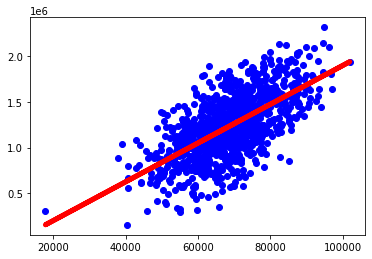

In [98]:
# plot for the training/testing split data for income vs price 
y1_pred = testing_model_1_income.predict(X1_test)
plt.scatter(X1_test,Y1_test,color='blue')
plt.plot(X1_test,y1_pred,color='red',linewidth=5)
plt.show()

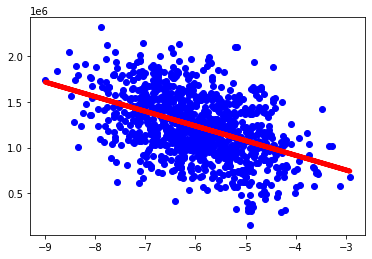

In [99]:
# plot for the training/testing split data for house age vs price 
y2_pred = testing_model_2_house_age.predict(X2_test)
plt.scatter(X2_test,Y2_test,color='blue')
plt.plot(X2_test,y2_pred,color='red',linewidth=5)
plt.show()

In [100]:
from sklearn import metrics

# let us see our performance metrics to give some more insight on our models
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))
print('R-squared:', metrics.r2_score(Y1_test, y1_pred))

Mean Absolute Error: 219728.3360181176
Mean Squared Error: 74084394120.77266
Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


In [101]:
# let us see our performance metrics to give some more insight on our models
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_test, y2_pred)))
print('R-squared:', metrics.r2_score(Y2_test, y2_pred))

Mean Absolute Error: 250905.68320890114
Mean Squared Error: 98745342410.34055
Root Mean Squared Error: 314237.71640326775
R-squared: 0.20108184214726899


In [107]:
import random

rsquare = []
for i in range(10):
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(X1, Y1, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X3_train, Y3_train)
    Y3_pred = model.predict(X3_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y3_test, Y3_pred), \
                                                                      model.coef_, model.intercept_))
    rsquare.append(metrics.r2_score(Y3_test,Y3_pred))

Trial 0, R-squared: 0.39984039714157427,  Slope: [[21.20043622]], Intercept: [-221484.8067346],  
Trial 1, R-squared: 0.3832956633984642,  Slope: [[21.06081326]], Intercept: [-210851.40334885],  
Trial 2, R-squared: 0.3828037268181622,  Slope: [[21.2671446]], Intercept: [-229057.95001167],  
Trial 3, R-squared: 0.3828037268181622,  Slope: [[21.2671446]], Intercept: [-229057.95001167],  
Trial 4, R-squared: 0.38849671972077704,  Slope: [[21.35960475]], Intercept: [-235585.67452483],  
Trial 5, R-squared: 0.42203432539802554,  Slope: [[21.1987568]], Intercept: [-220455.26742259],  
Trial 6, R-squared: 0.38342009764202023,  Slope: [[21.44758394]], Intercept: [-239836.57143656],  
Trial 7, R-squared: 0.4058484215226462,  Slope: [[21.00281449]], Intercept: [-210445.23503711],  
Trial 8, R-squared: 0.37354189071089505,  Slope: [[21.52822703]], Intercept: [-245736.88122343],  
Trial 9, R-squared: 0.44627477772121027,  Slope: [[20.99145114]], Intercept: [-208490.34100695],  


<AxesSubplot:xlabel='Trial'>

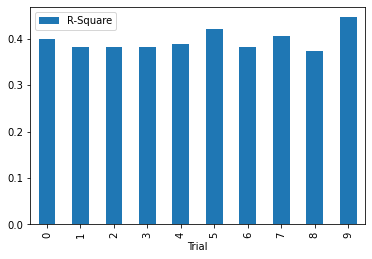

In [110]:
rdf = pd.DataFrame({'Trial':range(10),'R-Square': rsquare})
rdf.plot.bar(x='Trial',y='R-Square')

(array([1., 4., 1., 1., 1., 0., 1., 0., 0., 1.]),
 array([0.37354189, 0.38081518, 0.38808847, 0.39536176, 0.40263505,
        0.40990833, 0.41718162, 0.42445491, 0.4317282 , 0.43900149,
        0.44627478]),
 <BarContainer object of 10 artists>)

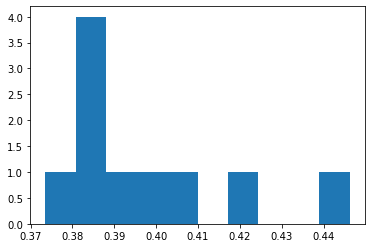

In [114]:
# lets take a look at the R-Square value to determine if its acceptable to pass 10-Fold Validation
plt.hist(rsquare)

In [123]:
sum_r_square=int()
for index,element in enumerate(rsquare):
    sum_r_square+=element
    index=index
#accounting for the index-0
index+=1
sum_r_square/index

0.39683597468919374

In [127]:
## Lets take a look at he mean of our R-Square Value
print(rdf['R-Square'].mean())

0.39683597468919374


In [124]:
'''This is an acceptable consistent model that is shown to have very little variance among the model's R-Square metric, indicating that it is a good model even when using a different random_state value.'''

"This is an acceptable consistent model that is shown to have very little variance among the model's R-Square metric, indicating that it is a good model even when using a different random_state value."

***Pick an additional variable to build a two-factors linear regression model***


In [126]:
'''As we have already done much of the work for the two-factors linear regression model above, I will just call those objects as they are functionally found throughout our Jupter Notebook '''

'As we have already done much of the work for the two-factors linear regression model above, I will just call those objects as they are functionally found throughout our Jupter Notebook '

In [128]:
## Let us add our second feature to our linear regression model
X = housing[['Income','HouseAge']].values.reshape(-1,2)
Y = housing['Price'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [129]:
# Inspection of our new data-frame
housing[['Income','HouseAge']].head()

,Income,HouseAge
0,79545.45857,5.682861
1,79248.64245,6.002900
2,61287.06718,5.865890
3,63345.24005,7.188236
4,59982.19723,5.040555


In [131]:
model_2_features = LinearRegression()
model_2_features.fit(X_train, Y_train)
Y_pred = model_2_features.predict(X_test)
print(model_2_features.coef_)
print(model_2_features.intercept_)

[[2.12204386e+01 1.60427782e+05]]
[-1181216.65021218]


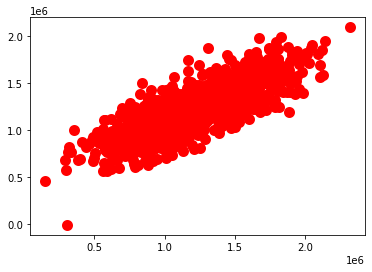

In [132]:
plt.scatter(Y_test,Y_pred,color='red',linewidths=5)
plt.show()

In [133]:
print('R-Squared:',metrics.r2_score(Y_test,Y_pred))

R-Squared: 0.6111416177920193


Trial 0, R-squared: 0.607253417804352,  Slope: [[2.12157338e+01 1.63410244e+05]], Intercept: [-1200852.92208736],  
Trial 1, R-squared: 0.646297500848084,  Slope: [[2.10055923e+01 1.61760851e+05]], Intercept: [-1173353.86634988],  
Trial 2, R-squared: 0.5917550215102625,  Slope: [[2.15185669e+01 1.59481881e+05]], Intercept: [-1198606.42177876],  
Trial 3, R-squared: 0.600950545003923,  Slope: [[2.13391874e+01 1.63374121e+05]], Intercept: [-1206753.08810138],  
Trial 4, R-squared: 0.5759101229199971,  Slope: [[2.14225089e+01 1.60578408e+05]], Intercept: [-1197017.57788074],  
Trial 5, R-squared: 0.6129048038352931,  Slope: [[2.12174436e+01 1.64620765e+05]], Intercept: [-1206172.52066957],  
Trial 6, R-squared: 0.6030397259068485,  Slope: [[2.13981936e+01 1.61078670e+05]], Intercept: [-1197542.48855598],  
Trial 7, R-squared: 0.607253417804352,  Slope: [[2.12157338e+01 1.63410244e+05]], Intercept: [-1200852.92208736],  
Trial 8, R-squared: 0.5704118232588695,  Slope: [[2.14076703e+01 1.6

<AxesSubplot:xlabel='trial'>

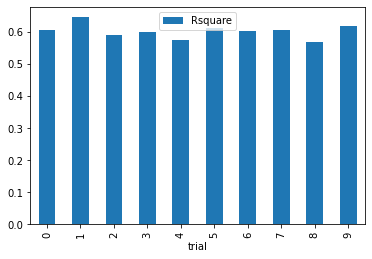

In [134]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [135]:
print(rdf['Rsquare'].mean())

0.6036180019019259


(array([2., 0., 1., 0., 4., 1., 1., 0., 0., 1.]),
 array([0.57041182, 0.57800039, 0.58558896, 0.59317753, 0.60076609,
        0.60835466, 0.61594323, 0.6235318 , 0.63112037, 0.63870893,
        0.6462975 ]),
 <BarContainer object of 10 artists>)

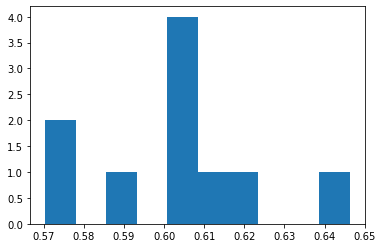

In [140]:
plt.hist(rdf['Rsquare'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7e5eff880>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7e9b9c5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7b0f26bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7e65348e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7ec24be80>],
 'means': []}

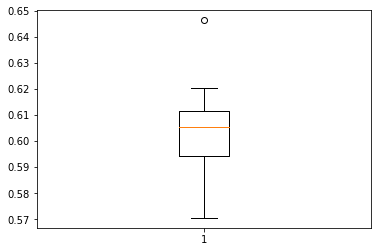

In [141]:
plt.boxplot(rdf['Rsquare'].values)

### Now load the Salary data set

In [143]:
# Load the dataset
df = pd.read_csv("Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [144]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [145]:
df.isnull().any() 
# or
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

In [146]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(399, 6)

<AxesSubplot:xlabel='Salary'>

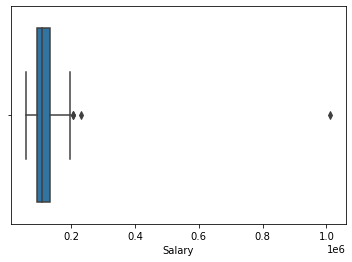

In [147]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

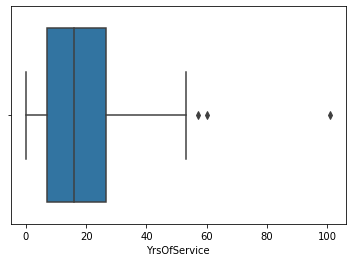

In [148]:
sns.boxplot(x=df['YrsOfService'])

In [149]:
# remove un-reasonable data, 
df = df[df['YrsOfService'] < 70]
df = df[df['Salary'] < 400000]
df.shape

(397, 6)

<AxesSubplot:xlabel='Salary'>

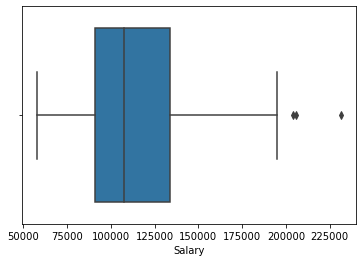

In [150]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

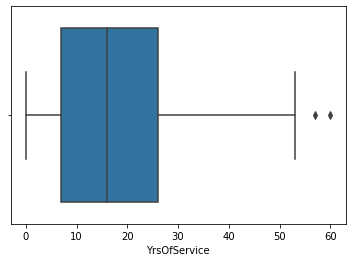

In [151]:
sns.boxplot(x=df['YrsOfService'])

In [152]:
df.shape

(397, 6)

In [153]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


***In general it is a good idea to reset the index after we remove rows***

In [154]:
df = df.reset_index()
df.tail()

,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,398,Prof,A,33.0,30.0,Male,103106
393,399,Prof,A,31.0,19.0,Male,150564
394,400,Prof,A,42.0,25.0,Male,101738
395,401,Prof,A,25.0,15.0,Male,95329
396,402,AsstProf,A,8.0,4.0,Male,81035


### Now we are ready to use this data to build model ###

1. Separate numerical features from categorical features
2. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
3. Check if the model pass cross validation
4. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable
to build a second model.
5. Comment on if the model improve or not

***Type your code here***

In [155]:
# ignore longitude and latitude
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']
#categorical_features = ['....']'
numerical_df = df[numerical_features]
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [156]:
X = numerical_df[['YrsSincePhd','YrsOfService']].values.reshape(-1,2)
Y = numerical_df['Salary'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(317, 2) (80, 2)
(317, 1) (80, 1)


In [157]:
# Inspection of our new data-frame
numerical_df[['YrsSincePhd','YrsOfService']].head()

,YrsSincePhd,YrsOfService
0,19.0,18.0
1,20.0,16.0
2,4.0,3.0
3,45.0,39.0
4,40.0,41.0


In [158]:
# Build Our Model
model_salary = LinearRegression()
model_salary.fit(X_train, Y_train)
Y_pred = model_2_features.predict(X_test)
print(model_salary.coef_)
print(model_salary.intercept_)

[[1562.10623873 -655.56735924]]
[90991.6138581]


Trial 0, R-squared: 0.14914555906708815,  Slope: [[1497.16372006 -532.13199173]], Intercept: [89625.964423],  
Trial 1, R-squared: 0.2143571974484655,  Slope: [[1492.12046352 -635.2194708 ]], Intercept: [91178.11767177],  
Trial 2, R-squared: 0.007683738753570868,  Slope: [[1703.1396319  -699.24152443]], Intercept: [88287.6659329],  
Trial 3, R-squared: 0.14933623928991802,  Slope: [[1733.34236245 -844.4886995 ]], Intercept: [89395.52652632],  
Trial 4, R-squared: -0.1774562187200892,  Slope: [[1687.35816374 -621.45179797]], Intercept: [88817.67174678],  
Trial 5, R-squared: -0.2663484473501265,  Slope: [[1719.04822692 -582.8503768 ]], Intercept: [87177.79073305],  
Trial 6, R-squared: 0.18701231146192887,  Slope: [[1706.2602455  -873.89261143]], Intercept: [90241.4624871],  
Trial 7, R-squared: 0.24322630664241796,  Slope: [[1384.58646767 -544.37419265]], Intercept: [92042.91525636],  
Trial 8, R-squared: 0.1489261827947611,  Slope: [[1595.13451122 -635.64220277]], Intercept: [88991.1

<AxesSubplot:xlabel='trial'>

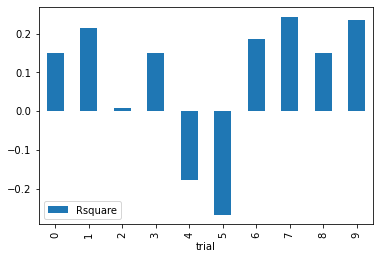

In [159]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [160]:
print(rdf['Rsquare'].mean())

0.08909033487934115


(array([1., 1., 0., 0., 0., 1., 0., 0., 4., 3.]),
 array([-0.26634845, -0.21539097, -0.1644335 , -0.11347602, -0.06251855,
        -0.01156107,  0.03939641,  0.09035388,  0.14131136,  0.19226883,
         0.24322631]),
 <BarContainer object of 10 artists>)

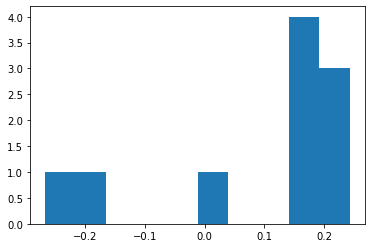

In [161]:
plt.hist(rdf['Rsquare'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7ecafeca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7ecb083a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7ecafe940>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7ecb08a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7ecb08dc0>],
 'means': []}

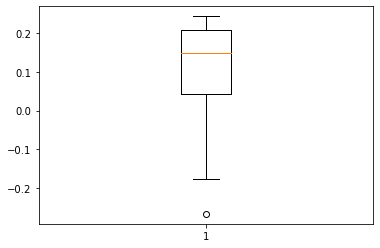

In [162]:
plt.boxplot(rdf['Rsquare'].values)

In [163]:
'''This Does Not Pass Validation as clearly showcased by the above EDA'''

'This Does Not Pass Validation as clearly showcased by the above EDA'

In [201]:
categorical_features = ['Discipline','Rank','Sex']
label = 'Salary'
numerical_features = ['YrsSincePhd', 'YrsOfService']
numerical_df = df[[label]+numerical_features]
numerical_df.head(5)

,Salary,YrsSincePhd,YrsOfService
0,139750,19.0,18.0
1,173200,20.0,16.0
2,79750,4.0,3.0
3,115000,45.0,39.0
4,141500,40.0,41.0


In [202]:
numerical_df.corr()

,Salary,YrsSincePhd,YrsOfService
Salary,1.000000,0.415792,0.330874
YrsSincePhd,0.415792,1.000000,0.909341
YrsOfService,0.330874,0.909341,1.000000


In [203]:
categorical_df = df[categorical_features]
categorical_df.head()

,Discipline,Rank,Sex
0,B,Prof,Male
1,B,Prof,Male
2,B,AsstProf,Male
3,B,Prof,Male
4,B,Prof,Male


In [204]:
df.describe()

,index,YrsSincePhd,YrsOfService,Salary
count,397.000000,397.000000,397.000000,397.000000
mean,201.926952,22.259446,17.556675,113656.375315
std,116.632645,12.870987,12.970633,30240.786440
min,0.000000,1.000000,0.000000,57800.000000
25%,103.000000,12.000000,7.000000,91000.000000
50%,203.000000,21.000000,16.000000,107300.000000
75%,302.000000,32.000000,26.000000,134000.000000
max,402.000000,56.000000,60.000000,231545.000000


In [205]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
salary_cat_1hot = cat_encoder.fit_transform(categorical_df)
salary_cat_1hot

<397x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1191 stored elements in Compressed Sparse Row format>

In [206]:
salary_cat_1hot.toarray()

array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [207]:
# This is showcasing all the UNIQUE elements that make up each categorical feature in our dataframe 
# Very Useful for showcasing the data in a very presentable way
cat_encoder.categories_

[array(['A', 'B'], dtype=object),
 array(['AssocProf', 'AsstProf', 'Prof'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [208]:
# Lets create our new DataFrame by calling on pandas to create a dataframe with the categories against our toarray() method which we called earlier
new_df = pd.DataFrame(salary_cat_1hot.toarray(), columns = cat_encoder.categories_)

ValueError: all arrays must be same length

In [209]:
# Categorical_features = ['Discipline','Rank','Sex']
# So all have the same length so instead lets split up the dataframes and merge them on the index as three seperate frames
# NOTE SEX, RANK are both the same length its the Professor one that has three separate categories 
discipline = ['Discipline']
rank = ['Rank']
sex = ['Sex']
df_discipline = df[discipline]
df_rank = df[rank]
df_sex = df[sex]

In [210]:
cat_discipline_encoder = OneHotEncoder()
salary_cat_discipline_1hot = cat_encoder.fit_transform(df_discipline)
salary_cat_discipline_1hot

cat_rank_encoder = OneHotEncoder()
salary_cat_rank_1hot = cat_encoder.fit_transform(df_rank)
salary_cat_rank_1hot

cat_sex_encoder = OneHotEncoder()
salary_cat_sex_1hot = cat_encoder.fit_transform(df_sex)
salary_cat_sex_1hot

new_df_discipline = pd.DataFrame(salary_cat_discipline_1hot.toarray(), columns = cat_discipline_encoder.categories_)

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [211]:
## Lets Try A Different Approach 
categorical_prox = pd.get_dummies(df[categorical_features],drop_first=True)
categorical_prox

,Discipline_B,Rank_AsstProf,Rank_Prof,Sex_Male
0,1,0,1,1
1,1,0,1,1
2,1,1,0,1
3,1,0,1,1
4,1,0,1,1
...,...,...,...,...
392,0,0,1,1
393,0,0,1,1
394,0,0,1,1
395,0,0,1,1


In [213]:
categorical_dummy_df2 = pd.concat([numerical_df[['YrsSincePhd', 'YrsOfService','Salary']], categorical_prox ], axis=1)
categorical_dummy_df2.head()

,YrsSincePhd,YrsOfService,Salary,Discipline_B,Rank_AsstProf,Rank_Prof,Sex_Male
0,19.0,18.0,139750,1,0,1,1
1,20.0,16.0,173200,1,0,1,1
2,4.0,3.0,79750,1,1,0,1
3,45.0,39.0,115000,1,0,1,1
4,40.0,41.0,141500,1,0,1,1


In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(categorical_dummy_df2.drop('Salary',axis=1), 
                                                    categorical_dummy_df2['Salary'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [215]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

79899.32431013079
[   380.68724164   -543.92191945  15144.50001942 -15790.09728759
  33739.03923238   7187.72035382]
R-squared: 0.4253748418333839


In [216]:
'''Our highest R-Squared Values just using the numerical features was a .24 or 24%. That being said that was the highest value that we observed in our K-FOLD testing. It is important to note that albeit that number being far smaller than our new R-Squared value of 0.42 or 42%, the average of our R-Squared values using only the numerical features was far lower at .08 or 8%. Which is about a 400% increase in improvement when utilizing our categorical variables in our model.'''

'Our highest R-Squared Values just using the numerical features was a .24 or 24%. That being said that was the highest value that we observed in our K-FOLD testing. It is important to note that albeit that number being far smaller than our new R-Squared value of 0.42 or 42%, the average of our R-Squared values using only the numerical features was far lower at .08 or 8%. Which is about a 400% increase in improvement when utilizing our categorical variables in our model.'

Trial 0, R-squared: 0.4160611116737649,  Slope: [   417.92093561   -360.67970622  12977.72686467 -11560.73059254
  33836.39497142   4772.10735955], Intercept: 79891.70258196763,  
Trial 1, R-squared: 0.47655127565164235,  Slope: [   400.81679807   -428.15192192  13203.35593406 -15330.314902
  28983.81925743   3845.33639364], Intercept: 83178.18987066069,  
Trial 2, R-squared: 0.4944555300025629,  Slope: [   496.58317674   -397.26047506  13662.66935615 -12950.64377876
  30777.398444     5731.13721479], Intercept: 78189.74301566312,  
Trial 3, R-squared: 0.33378259136550836,  Slope: [   416.38107169   -281.30963223  16709.40990528 -11702.36282221
  33588.98228328   4981.01282434], Intercept: 75767.74087998844,  
Trial 4, R-squared: 0.48628344706862303,  Slope: [   615.39685806   -580.10194772  15312.99137722 -14165.85928858
  31598.03147119   1733.58756252], Intercept: 81083.8889057469,  
Trial 5, R-squared: 0.4568119962724382,  Slope: [   562.02090956   -430.40170543  13165.34604739 -11

<AxesSubplot:xlabel='trial'>

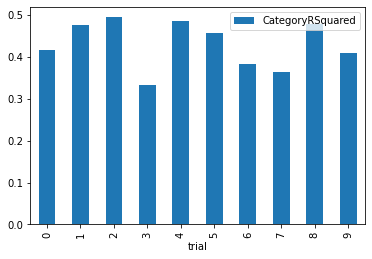

In [225]:
cat_rsquare=[]
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(categorical_dummy_df2.drop('Salary',axis=1),categorical_dummy_df2['Salary'],test_size=0.30,random_state=random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    cat_rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
cat_rdf = pd.DataFrame( {'trial': range(10), 'CategoryRSquared': cat_rsquare})
cat_rdf.plot.bar(x='trial', y='CategoryRSquared')

In [227]:
print(cat_rdf['CategoryRSquared'].mean())

0.42983522058365375


(array([1., 1., 0., 1., 1., 1., 0., 1., 2., 2.]),
 array([0.33378259, 0.34984989, 0.36591718, 0.38198447, 0.39805177,
        0.41411906, 0.43018635, 0.44625365, 0.46232094, 0.47838824,
        0.49445553]),
 <BarContainer object of 10 artists>)

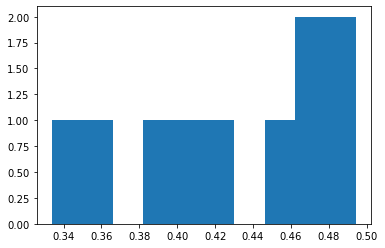

In [229]:
plt.hist(cat_rdf['CategoryRSquared'].values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7ecfc07f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7ecfc0eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7ecfc0490>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7ecfcd5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7ecfcd910>],
 'means': []}

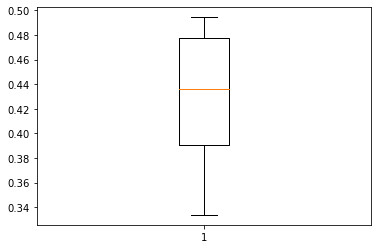

In [233]:
plt.boxplot(cat_rdf['CategoryRSquared'].values)

In [ ]:
'''Average 42% versus 8%, a substantial incra'''